In [1]:
# Mount your Google Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nbformat
from IPython import get_ipython

def import_ipynb(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)

    # Esegui ogni cella del notebook
    ip = get_ipython()
    for cell in nb.cells:
        if cell.cell_type == 'code':
            ip.run_cell(cell.source)


notebook_CompareSortAlgorithm = '/content/drive/My Drive/Colab Notebooks/ASD/InsertionSort_VS_MergeSort/CompareSortAlgorithm.ipynb'
import_ipynb(notebook_CompareSortAlgorithm)


In [5]:
import random
import builtins

#Con le righe di codice seguenti evito di sovrascrivere la funzione built-in
#di python "sorted" scansando l'errore "sorted is no longer callable"
if 'sorted' in globals() and not callable(globals()['sorted']):
    sorted = builtins.sorted

comparison = SortingComparison()
sizes = [50, 100, 500, 1000, 5000]
structures = ["random", "almost_sorted", "reversed", "sorted_list"]

results = comparison.compareAlgorithms(sizes, structures)
comparison.analyzeResults(results)


Inizializing sort algorithms class...

--- Sorting Algorithm Comparison ---

***********************************************
[Input Size: 50 - Structure: random]
Insertion Sort Time: 0.000172 seconds
Merge Sort Time: 0.000116 seconds
Faster: Merge Sort
***********************************************
[Input Size: 100 - Structure: random]
Insertion Sort Time: 0.000548 seconds
Merge Sort Time: 0.000207 seconds
Faster: Merge Sort
***********************************************
[Input Size: 500 - Structure: random]
Insertion Sort Time: 0.018608 seconds
Merge Sort Time: 0.001324 seconds
Faster: Merge Sort
***********************************************
[Input Size: 1000 - Structure: random]
Insertion Sort Time: 0.061016 seconds
Merge Sort Time: 0.003037 seconds
Faster: Merge Sort
***********************************************
[Input Size: 5000 - Structure: random]
Insertion Sort Time: 1.596292 seconds
Merge Sort Time: 0.017302 seconds
Faster: Merge Sort
*************************************

##Analisi degli esperimenti

- ### Insertion Sort
Risulta essere efficiente per liste piccole o quasi ordinate, tuttavia ha una complessità $O(n^2)$ nei casi peggiori e si osserva non essere adatto per input di grandi dimensioni.

- ### Merge Sort
Anche nei casi peggiori mantiene una complessità $O(nlogn)$ ed è ideale per input di grandi dimensioni e/o strutture casuali. Tuttavia risulta essere meno efficiente per liste piccole rispetto Insertion Sort.



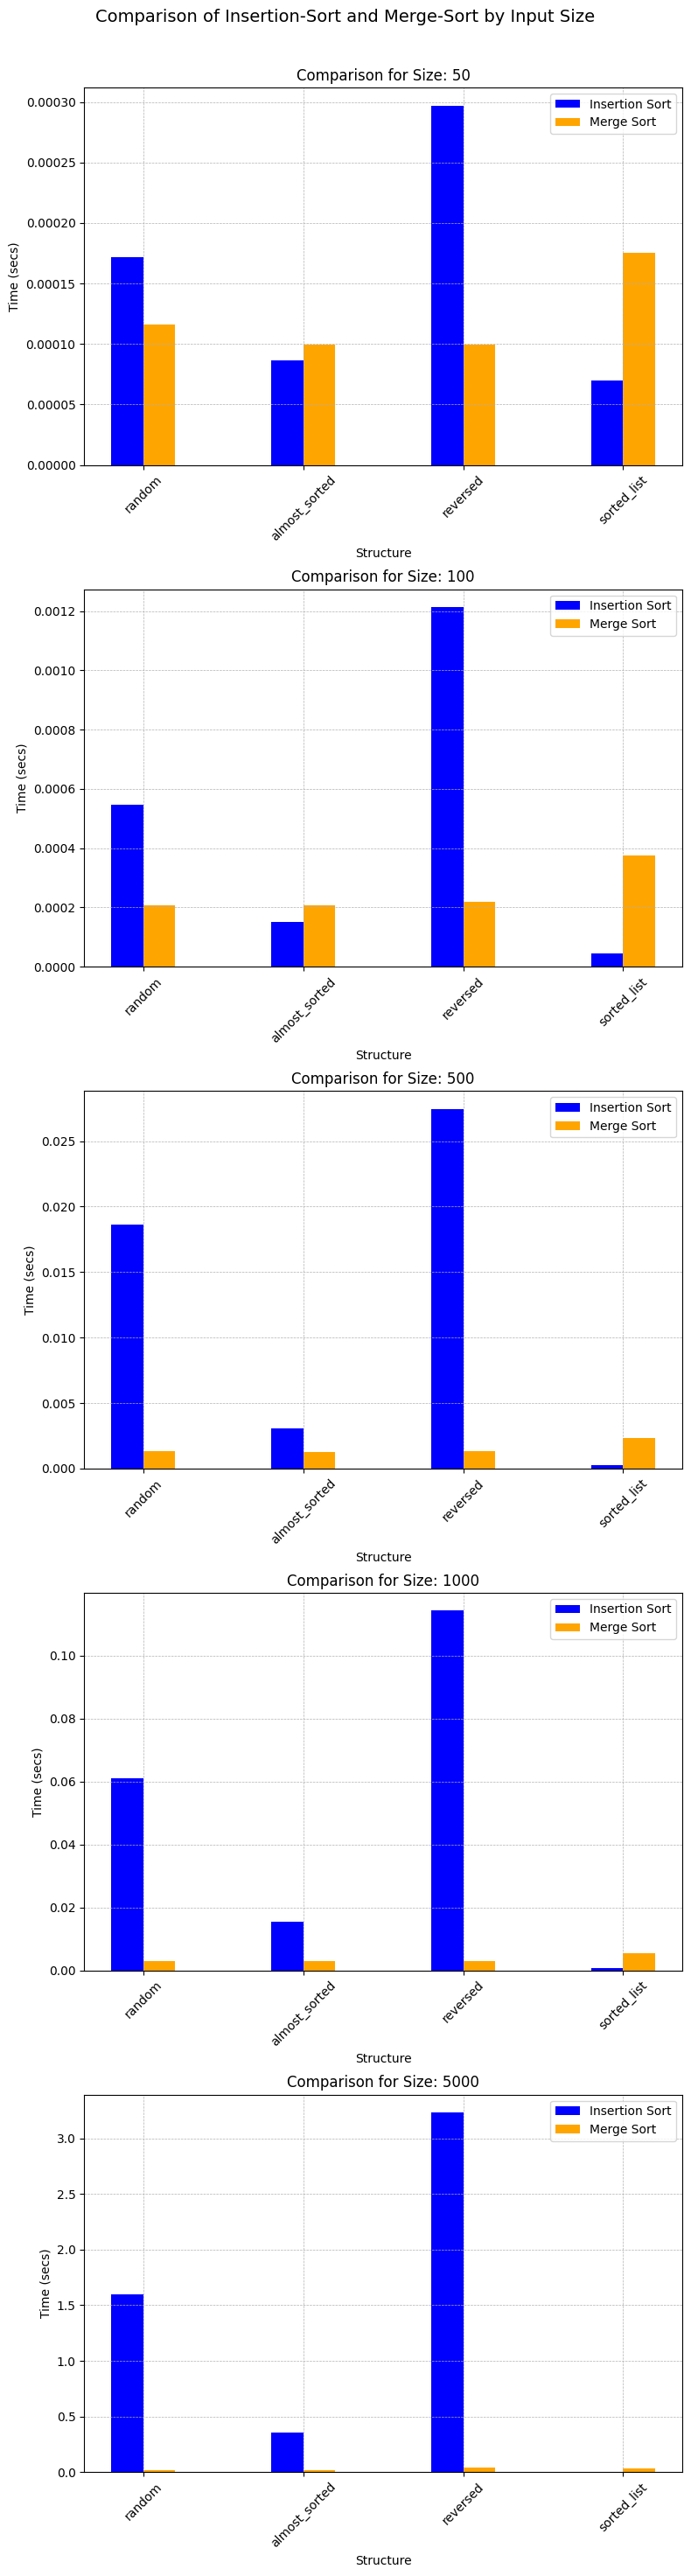

In [17]:
import matplotlib.pyplot as plt


# estraggo ogni tipo di dimensione e di struttura
sizes = sorted(set(item["size"] for item in results))
structures = sorted(set(item["structure"] for item in results))

# creo tanti subplot quanti sono le categorie di sizes
fig, axes = plt.subplots(len(sizes), 1, figsize=(8, 6 * len(sizes)))

if len(sizes) == 1:
    axes = [axes]  # Se c'è un solo size, assicurarsi che 'axes' sia una lista

for i, size in enumerate(sizes):
    ax = axes[i]

    # devo ottenere solo i dati relativi alla size corrente
    subset = [item for item in results if item["size"] == size]

    # estraggo quindi dal subset creato i dati per generare l'infografica
    x = [item["structure"] for item in subset]
    insertion_times = [item["insertion_sort_time"] for item in subset]
    merge_times = [item["merge_sort_time"] for item in subset]

    # Creare il grafico a barre
    bar_width = 0.2
    indices = range(len(x))
    ax.bar(indices, insertion_times, bar_width, label="Insertion Sort",
           color="blue")
    ax.bar([idx + bar_width for idx in indices], merge_times, bar_width,
           label="Merge Sort", color="orange")

    #grafico a linee sostitutivo
    #ax.plot(indices, insertion_times, label="Insertion Sort", color="blue"
                              #marker='o')
    #ax.plot(x, merge_times, label="Merge Sort", marker="o", color="orange")

    # Configurazione degli assi
    ax.set_title(f"Comparison for Size: {size}", fontsize=12)
    ax.set_xlabel("Structure")
    ax.set_ylabel("Time (secs)")
    ax.set_xticks([idx + bar_width / 2 for idx in indices])
    ax.set_xticklabels(x, rotation=45)
    ax.legend()
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Titolo generale
fig.suptitle("Comparison of Insertion-Sort and Merge-Sort by Input Size",
             fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Mostra i grafici
plt.show()

